In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
df_genes = pd.read_csv('WS260_ce10/WS260_ce10.genes_by_CV.tsv', sep='\t').drop_duplicates(subset=['gene_id'])
print('%d gene records loaded' % (len(df_genes),))

fp_regl = 'annot/S2_regulatory_annotation/S2_regulatory_annotation.tsv'
df_regl = pd.read_csv(fp_regl, sep='\t')
print('%d regions loaded' % (len(df_regl),))

46742 gene records loaded
42245 regions loaded


In [3]:
l_ = list(df_regl.query('annot_fwd == "coding_promoter"')['promoter_gene_id_fwd'])\
   + list(df_regl.query('annot_rev == "coding_promoter"')['promoter_gene_id_rev'])
s_ = pd.Series(list(filter(lambda gene_id: gene_id != '.', l_)))
df_ = pd.DataFrame(s_.value_counts(), columns=['n_promoter'])
pr_ = df_genes.merge(df_, left_on='gene_id', right_index=True, how='left')['n_promoter']
df_genes['n_promoter'] = list(map(lambda n: n if n==n else 0, pr_))
df_genes.head()

,chrom,source,feature,start,end,score,strand,frame,gene_id,gene_source,...,Gerstein2014_L4,Gerstein2014_YA,Gerstein2014_CV,Latorre2015_oscillatory,Gerstein2014_max_rank,Gerstein2014_top15k_CV_rank,color,operon_id,operon_rank,n_promoter
0,chrI,WormBase,gene,3747,3909,.,-,.,WBGene00023193,WormBase,...,NaN,NaN,NaN,NaN,NaN,NaN,#56b4e9,.,0,0.0
1,chrI,WormBase,gene,4116,10230,.,-,.,WBGene00022277,WormBase,...,17.771486,29.094286,0.232,False,7674.0,4526.5,#e69f00,.,0,0.0
2,chrI,WormBase,gene,11495,16837,.,+,.,WBGene00022276,WormBase,...,134.416857,184.178286,0.517,False,453.0,7542.5,#0072b2,.,0,1.0
3,chrI,WormBase,gene,17487,26781,.,-,.,WBGene00022278,WormBase,...,19.295486,43.583714,0.136,False,5745.0,1928.5,#e69f00,.,0,1.0
4,chrI,WormBase,gene,22882,23600,.,-,.,WBGene00235381,WormBase,...,NaN,NaN,NaN,NaN,NaN,NaN,#56b4e9,.,0,0.0


In [4]:
l_ = list(df_regl.query('annot == "putative_enhancer"')['associated_gene_id'])
s_ = pd.Series(list(itertools.chain(*list([l_i_.split(',') for l_i_ in filter(lambda gene_id: gene_id != '.', l_)]))))
df_ = pd.DataFrame(s_.value_counts(), columns=['n_putative_enhancer'])
pe_ = df_genes.merge(df_, left_on='gene_id', right_index=True, how='left')['n_putative_enhancer']
df_genes['n_putative_enhancer'] = list(map(lambda n: n if n==n else 0, pe_))
df_genes.head()

,chrom,source,feature,start,end,score,strand,frame,gene_id,gene_source,...,Gerstein2014_YA,Gerstein2014_CV,Latorre2015_oscillatory,Gerstein2014_max_rank,Gerstein2014_top15k_CV_rank,color,operon_id,operon_rank,n_promoter,n_putative_enhancer
0,chrI,WormBase,gene,3747,3909,.,-,.,WBGene00023193,WormBase,...,NaN,NaN,NaN,NaN,NaN,#56b4e9,.,0,0.0,0.0
1,chrI,WormBase,gene,4116,10230,.,-,.,WBGene00022277,WormBase,...,29.094286,0.232,False,7674.0,4526.5,#e69f00,.,0,0.0,1.0
2,chrI,WormBase,gene,11495,16837,.,+,.,WBGene00022276,WormBase,...,184.178286,0.517,False,453.0,7542.5,#0072b2,.,0,1.0,1.0
3,chrI,WormBase,gene,17487,26781,.,-,.,WBGene00022278,WormBase,...,43.583714,0.136,False,5745.0,1928.5,#e69f00,.,0,1.0,1.0
4,chrI,WormBase,gene,22882,23600,.,-,.,WBGene00235381,WormBase,...,NaN,NaN,NaN,NaN,NaN,#56b4e9,.,0,0.0,0.0


In [5]:
df_genes['n_promoter'].value_counts()

0.0    36191
1.0     6945
2.0     2420
3.0      783
4.0      283
5.0       82
6.0       26
7.0       10
8.0        2
Name: n_promoter, dtype: int64

In [6]:
df_genes['n_putative_enhancer'].value_counts()

0.0     40810
1.0      3309
2.0      1104
3.0       521
4.0       280
5.0       187
6.0       120
7.0        91
8.0        60
9.0        46
10.0       37
12.0       36
11.0       25
13.0       17
16.0       13
15.0       13
14.0       12
17.0       12
18.0       12
23.0        7
20.0        7
22.0        5
19.0        4
24.0        3
21.0        3
27.0        2
25.0        2
33.0        1
38.0        1
32.0        1
28.0        1
Name: n_putative_enhancer, dtype: int64

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


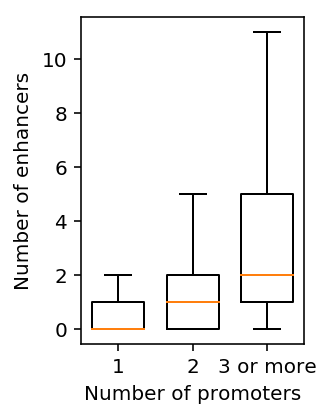

In [7]:
plt.figure(figsize=(2,3))
plt.boxplot([
    df_genes.query('n_promoter == 1')['n_putative_enhancer'],
    df_genes.query('n_promoter == 2')['n_putative_enhancer'],
    df_genes.query('n_promoter >= 3')['n_putative_enhancer'],
],
    labels = ['1', '2', '3 or more'],
    sym='', # Do not show outliers -- by eye, <100 in each group...
    widths=0.7,
)
plt.xlabel('Number of promoters')
plt.ylabel('Number of enhancers')
plt.savefig('annot/FigA_mapping/npromoter_vs_nenhancer.pdf', bbox_inches='tight')